In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATH = 'C:\Conda'
PATH=os.path.join(PATH, 'raw-img')


train_dir = os.path.join(PATH, 'training')
validation_dir = os.path.join(PATH, 'testing')



train_dogs_dir = os.path.join(train_dir, 'cane')
train_cats_dir = os.path.join(train_dir, 'gato')
train_horses_dir = os.path.join(train_dir, 'cavallo')
#train_elefan_dir = os.path.join(train_dir, 'elefante')
#train_mariposa_dir = os.path.join(train_dir, 'farfalla')
train_gallina_dir = os.path.join(train_dir, 'gallina')
train_vaca_dir = os.path.join(train_dir, 'mucca')
#train_oveja_dir = os.path.join(train_dir, 'pecora')
train_arana_dir = os.path.join(train_dir, 'ragno')
train_ardilla_dir = os.path.join(train_dir, 'scoiattolo')

validation_dogs_dir=os.path.join(validation_dir, 'cane')
validation_cats_dir=os.path.join(validation_dir, 'gato')
validation_horses_dir=os.path.join(validation_dir, 'cavallo')
#validation_elefan_dir=os.path.join(validation_dir, 'elefante')
#validation_mariposa_dir=os.path.join(validation_dir, 'farfalla')
validation_gallina_dir=os.path.join(validation_dir, 'gallina')
validation_vaca_dir=os.path.join(validation_dir, 'mucca')
#validation_oveja_dir=os.path.join(validation_dir, 'pecora')
validation_arana_dir=os.path.join(validation_dir, 'ragno')
validation_ardilla_dir=os.path.join(validation_dir, 'scoiattolo')


num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_horses_tr = len(os.listdir(train_horses_dir))
#num_elefan_tr = len(os.listdir(train_elefan_dir))
#num_mariposa_tr = len(os.listdir(train_mariposa_dir))
num_gallina_tr = len(os.listdir(train_gallina_dir))
num_vaca_tr = len(os.listdir(train_vaca_dir))
#num_oveja_tr = len(os.listdir(train_oveja_dir))
num_arana_tr = len(os.listdir(train_arana_dir))
num_ardilla_tr = len(os.listdir(train_ardilla_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))
num_horses_val = len(os.listdir(validation_horses_dir))
#num_elefan_val = len(os.listdir(validation_elefan_dir))
#num_mariposa_val = len(os.listdir(validation_mariposa_dir))
num_gallina_val = len(os.listdir(validation_gallina_dir))
num_vaca_val= len(os.listdir(validation_vaca_dir))
#num_oveja_val = len(os.listdir(validation_oveja_dir))
num_arana_val = len(os.listdir(validation_arana_dir))
num_ardilla_val = len(os.listdir(validation_ardilla_dir))


print('total training gato images:', num_cats_tr)
print('total training perro images:', num_dogs_tr)
print('total training caballo images:', num_horses_tr)
#print('total training elenfante images:', num_elefan_tr)
#print('total training mariposa images:', num_mariposa_tr)
print('total training gallina images:', num_gallina_tr)
print('total training vaca images:', num_vaca_tr)
#print('total training oveja images:', num_oveja_tr)
print('total training araña images:', num_arana_tr)
print('total training ardilla images:', num_ardilla_tr)

print('total validation gato images:', num_cats_val)
print('total validation perro images:', num_dogs_val)
print('total validation caballo images:', num_horses_val)
#print('total validation elenfante images:', num_elefan_val)
#print('total validation mariposa images:', num_mariposa_val)
print('total validation gallina images:', num_gallina_val)
print('total validation vaca images:', num_vaca_val)
#print('total validation oveja images:', num_oveja_val)
print('total validation araña images:', num_arana_val)
print('total validation ardilla images:', num_ardilla_val)

total_train=num_cats_tr+num_dogs_tr+num_horses_tr+num_gallina_tr+num_vaca_tr+num_arana_tr+num_ardilla_tr
total_val=num_cats_val+num_dogs_val+num_horses_val+num_gallina_val+num_vaca_val+num_arana_val+num_ardilla_val


#total_train=num_cats_tr+num_dogs_tr+num_horses_tr+num_elefan_tr+num_mariposa_tr+num_gallina_tr+num_vaca_tr+num_oveja_tr+num_arana_tr+num_ardilla_tr
#total_val=num_cats_val+num_dogs_val+num_horses_val+num_elefan_val+num_mariposa_val+num_gallina_val+num_vaca_val+num_oveja_val+num_arana_val+num_ardilla_val

print ('Total entrenamiento: ',total_train)
print ('Total pruebas: ',total_val)

total training gato images: 1290
total training perro images: 3702
total training caballo images: 2093
total training gallina images: 2475
total training vaca images: 1492
total training araña images: 3857
total training ardilla images: 1489
total validation gato images: 333
total validation perro images: 972
total validation caballo images: 524
total validation gallina images: 619
total validation vaca images: 373
total validation araña images: 964
total validation ardilla images: 372
Total entrenamiento:  16398
Total pruebas:  4157


In [30]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150


In [31]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [32]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')




Found 16398 images belonging to 7 classes.
Found 4157 images belonging to 7 classes.


In [33]:
# get a dictionary of class names
classes_dictionary = train_data_gen.class_indices
# turn classes dictionary into a list
class_keys = list(classes_dictionary.keys())
# get the number of classes
n_classes = len(class_keys)

In [34]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(n_classes), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


In [35]:
sample_training_images, s = next(train_data_gen)

In [36]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
def unaImagen(img):
    fig= plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.imshow(img[0])
    ax.axis('off')
    plt.tight_layout()
    plt.show()
print (s)

[[0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.

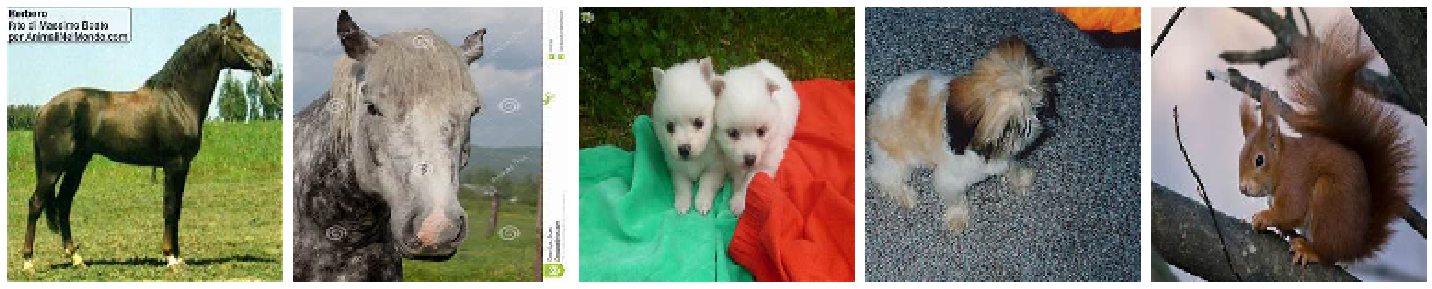

In [37]:
plotImages(sample_training_images[:5])


In [38]:

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', padding='same',input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=None, padding='valid'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=None, padding='valid'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=None, padding='valid'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=None, padding='valid'),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(n_classes, activation='softmax')
])


In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
128/128 [==============================] - 761s 6s/step - loss: 0.7418 - acc: 0.8124 - val_loss: 0.7485 - val_acc: 0.7808
Epoch 2/15
128/128 [==============================] - 1096s 9s/step - loss: 0.7484 - acc: 0.7814 - val_loss: 0.7485 - val_acc: 0.7808
Epoch 3/15
128/128 [==============================] - 1173s 9s/step - loss: 0.7479 - acc: 0.7817 - val_loss: 0.7485 - val_acc: 0.7808
Epoch 4/15
128/128 [==============================] - 1117s 9s/step - loss: 0.7482 - acc: 0.7813 - val_loss: 0.7485 - val_acc: 0.7808
Epoch 5/15
128/128 [==============================] - 1019s 8s/step - loss: 0.7479 - acc: 0.7819 - val_loss: 0.7485 - val_acc: 0.7808
Epoch 6/15
128/128 [==============================] - 920s 7s/step - loss: 0.7485 - acc: 0.7811 - val_loss: 0.7485 - val_acc: 0.7808
Epoch 7/15
128/128 [==============================] - 965s 8s/step - loss: 0.7479 - acc: 0.7815 - val_loss: 0.7485 - val_acc: 0.7808
Epoch 8/15
128/128 [==============================] - 899s 7s/ste

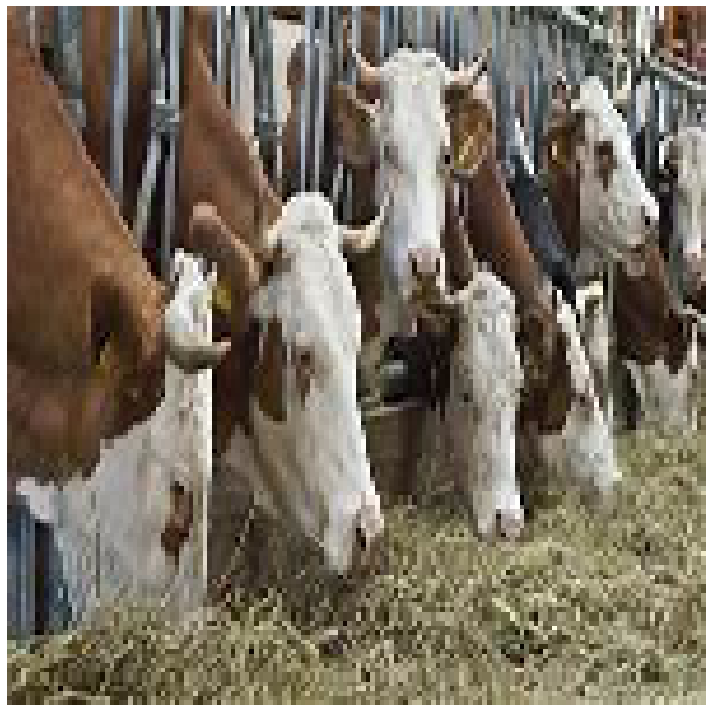

Label original  [4]
Label Predecido  6
Animal Original mucca
Animal Predecido scoiattolo
Certeza de prediccion :  14.428603649139404


ValueError: x and y must have same first dimension, but have shapes (15,) and (10,)

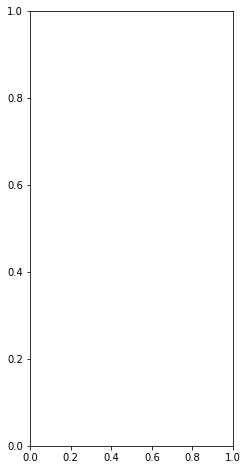

In [29]:
#una, algo = next(train_data_gen)
una, algo = next(val_data_gen)
unaImagen(una)



#intento de predecir, aun no funciona ya que no se interpretar el resultado
predictions = model.predict(una)



pre=np.argmax(predictions[0])

labelOriginal=np.where(algo[0] == 1)[0]
print ('Label original ',labelOriginal)
print ('Label Predecido ',pre)
print('Animal Original',class_keys[labelOriginal[0]])
print('Animal Predecido',class_keys[pre])
print ('Certeza de prediccion : ',100*np.max(predictions[0]))


acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

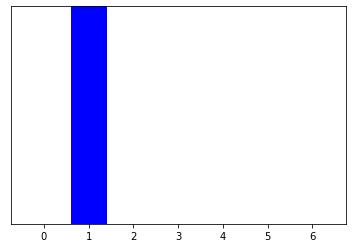

In [29]:
plot_value_array(0, predictions[0], labelOriginal)



In [25]:
from tensorflow import keras

In [26]:
model.save('10_86.h5')

In [27]:
#new_model = keras.models.load_model('animales1.h5')
new_model = keras.models.load_model('10_86.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


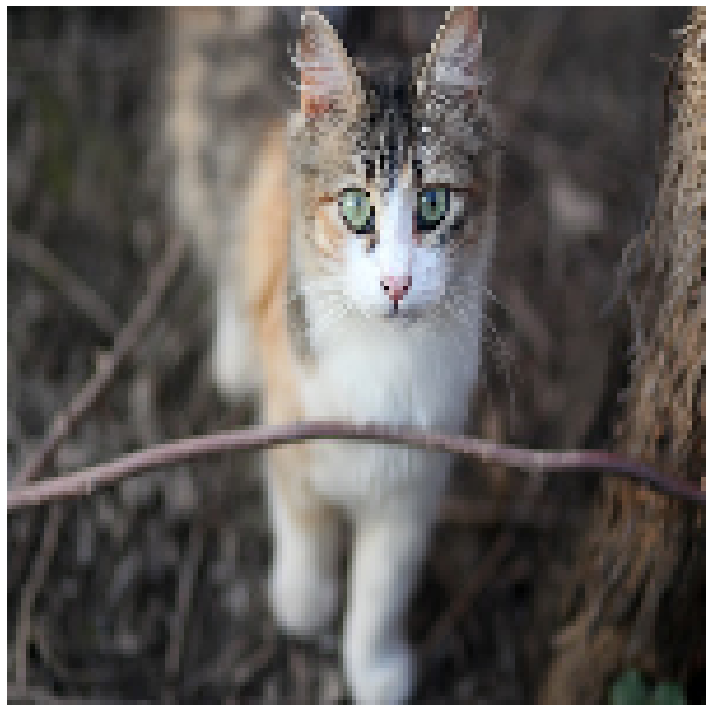

Label original  [3]
Label Predecido  1
Animal Original gato
Animal Predecido cavallo
Certeza de prediccion :  14.388655126094818


In [41]:
#una, algo = next(val_data_gen)
una, algo = next(val_data_gen)
unaImagen(una)



#intento de predecir, aun no funciona ya que no se interpretar el resultado
predictions = new_model.predict(una)



pre=np.argmax(predictions[0])

labelOriginal=np.where(algo[0] == 1)[0]
print ('Label original ',labelOriginal)
print ('Label Predecido ',pre)
print('Animal Original',class_keys[labelOriginal[0]])
print('Animal Predecido',class_keys[pre])
print ('Certeza de prediccion : ',100*np.max(predictions[0]))

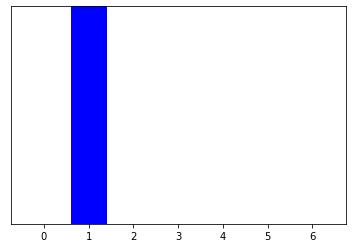

In [20]:
plot_value_array(0, predictions[0], labelOriginal)